### Análisis exploratorio de datos

Oscar Hernández Terán

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('DataBases/marketing_campaign.csv', sep='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print('Las dimensiones del DF son: \n',
      'Columnas:  ', df.shape[1], '\n',
      'Renglones: ', df.shape[0])

Las dimensiones del DF son: 
 Columnas:   29 
 Renglones:  2240


In [6]:
print('VALORES NULOS: ')
df.isnull().sum()

VALORES ANÓMALOS: 


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Cortamos los renglones que contienen valores nulos
df = df.dropna()

### Descripción de las variables

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Análisis exploratorio de datos

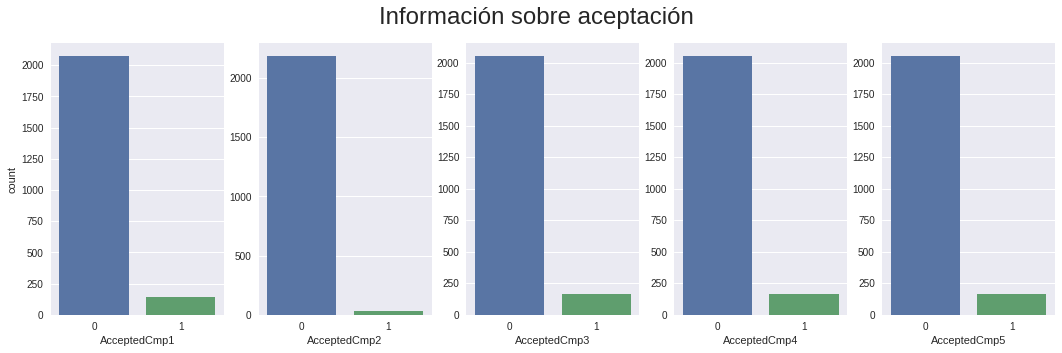

In [59]:
# Aceptación por campaña
cols_cam = [ 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

plt.figure(figsize=(18,5))
for idx, col in enumerate(cols_cam):
    plt.suptitle('Información sobre aceptación', fontsize=24)
    plt.subplot(1,5,idx+1)
    sns.countplot(x=col, data=df)
    if idx+1 >= 2:
        plt.ylabel('')
    
plt.show()

### Información demográfica

In [60]:
cols_dem = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']

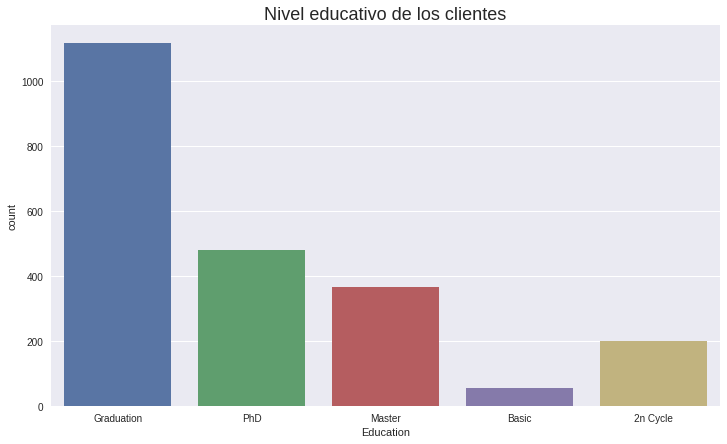

In [56]:
plt.figure(figsize=(12,7))
sns.countplot(x=cols_dem[0], data=df)
plt.title('Nivel educativo de los clientes', fontsize=18)
plt.show()

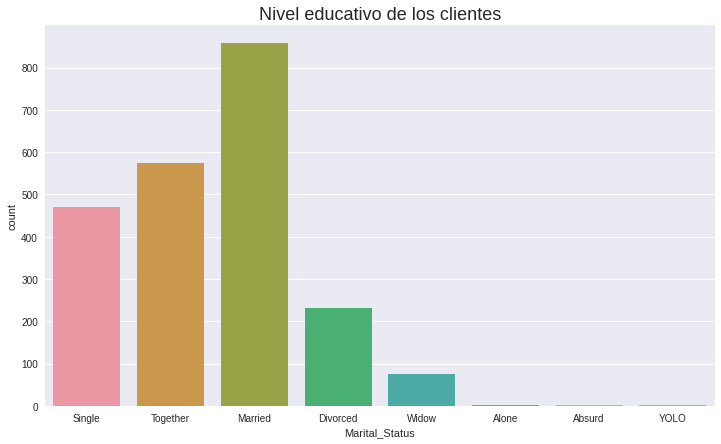

In [57]:
plt.figure(figsize=(12,7))
sns.countplot(x=cols_dem[1], data=df)
plt.title('Nivel educativo de los clientes', fontsize=18)
plt.show()

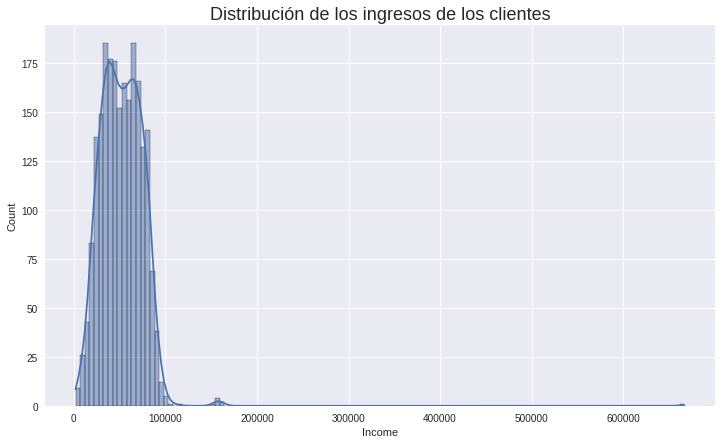

In [58]:
plt.figure(figsize=(12,7))
sns.histplot(df[cols_dem[2]], kde=True)
plt.title('Distribución de los ingresos de los clientes', fontsize=18)
plt.show()

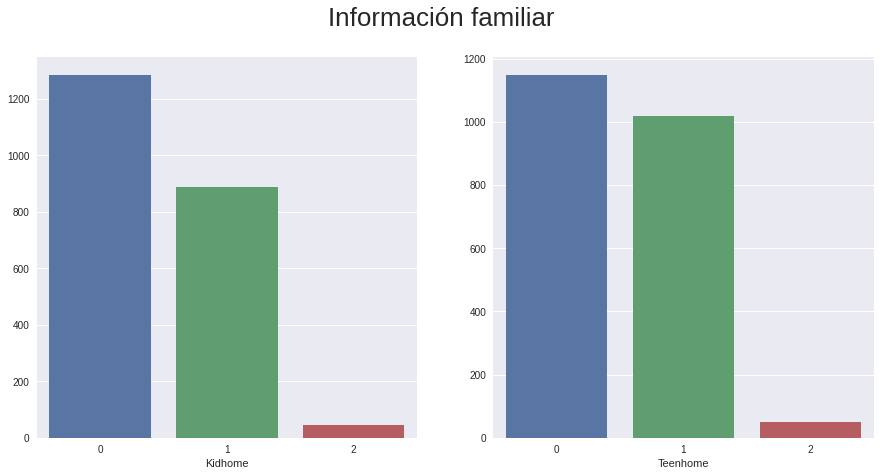

In [54]:
plt.figure(figsize=(15,7))
for i in range(3,5):
    plt.subplot(1,2,i-2)
    sns.countplot(x=cols_dem[i], data=df)
    plt.suptitle('Información familiar', fontsize=26)
    if idx+1 >= 2:
        plt.ylabel('')
    
plt.show()

### Gastos

In [61]:
cols_pro = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [67]:
df_prod = df[cols_pro]
df_prod.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


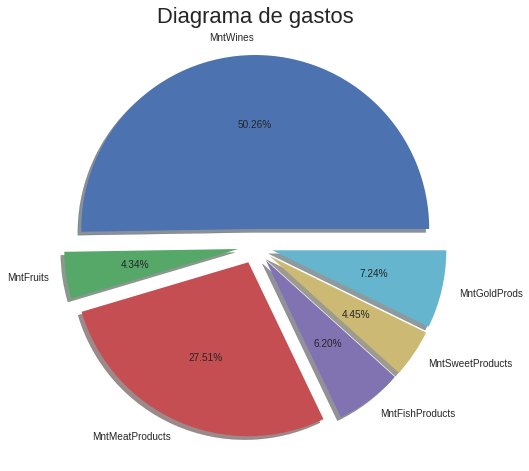

In [86]:
plt.figure(figsize=(8, 8))
labels = list(df_prod.columns)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df_prod.sum(), labels=df_prod.columns, shadow=True, explode=explode, autopct='%1.2f%%')
plt.title('Diagrama de gastos', fontsize=22)
plt.show()